In [13]:
import numpy as np
import matplotlib.pyplot as plt 
from copy import deepcopy, copy
import csv
import networkx as nx
import random
import time

# Zadanie 1 - Gauss-Jordan

Poniższa funkcja rozwiązuje układ równań postaci Ax = B, metodą Gaussa-Jordana. Przyjmuje ona macierz współczynników A, macierz wyrazów wolnych B oraz funkcję realizującą algorytm pivotingu. Funkcja pivoting w zależności od implementacji dostosowuje macierz A oraz zwraca kolumny, które zostały ze sobą zamienione (jeśli była taka potrzeba), aby później odtworzyć poprawną kolejność. Macierz A po wykonaniu funkcji powinna być macierzą jednostkową, macierz B natomiast zawiera wynik. 

In [2]:
# it destroys A matrix making it identity matrix
# result after invoking the function is in array B
# pivoting function returns numbers of swapped columns if there was a change
def gauss_jordan(A, B, pivoting):
    perm = [i for i in range(len(A))]
    for i in range(len(A[0])):
        c1, c2 = pivoting(A, B, i)
        perm[c1], perm[c2] = perm[c2], perm[c1]
        # counting
        for j in range(len(A)):
            if j != i: 
                d = -A[j][i]/A[i][i]
                for k in range(i, len(A[i])):
                    A[j][k] += d*A[i][k]
                B[j] += d*B[i]
        d = A[i][i]
        for k in range(i, len(A[0])):
            A[i][k] /= d
        B[i] /= d
    #restore order
    res = [0 for i in range(len(perm))]
    for i in range(len(perm)):
        res[perm[i]] = B[i]
    B[:] = res[:]

In [3]:
A = np.random.rand(5,5)
B = np.random.rand(5)

## Bez pivotingu

In [4]:
def no_pivoting(A, B, i):
    return i,i

In [5]:
An = deepcopy(A)
Bn = copy(B)
gauss_jordan(An, Bn, pivoting=no_pivoting)
print(An)
print((A @ Bn) - B)

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 -8.88178420e-16
   0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  5.55111512e-17  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   1.11022302e-16]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00]]
[-1.11022302e-16  1.11022302e-16  1.11022302e-16  0.00000000e+00
  4.44089210e-16]


Na początku sprawdzamy wersję bez pivotingu. Widzimy, że macierz A na wyjściu jest macierzą jednostkową oraz że A*xb=B (gdzie xb to wynik działania funkcji), więc funkcja działa poprawnie.

## Partial pivoting

In [6]:
def swap_rows(A, B, i, j):
    A[[i,j]] = A[[j,i]]
    B[i], B[j] = B[j], B[i]
def swap_columns(A, B, i, j):
    A[:, [j,i]] = A[:, [i,j]]

In [7]:
def partial_pivoting(A, B, i):
    besti = i
    for j in range(i+1,len(A)):
        if A[besti][i] < A[j][i]:
            besti = j
    swap_rows(A, B, i, besti)
    return i, i

In [8]:
Ap = deepcopy(A)
Bp = copy(B)
gauss_jordan(Ap, Bp, pivoting=partial_pivoting)
print(Ap)
print(A @ Bp - B)

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  1.11022302e-16
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00]
 [-1.38777878e-17  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00]]
[ 1.11022302e-16 -3.33066907e-16 -2.22044605e-16  1.11022302e-16
  1.11022302e-15]


Następnie realizujemy algorytm partial pivotingu. Bazuje on tylko na zamianach wierszy. Wyszukujemy wiersz, który w aktualnej kolumnie ma największą wartość i zamieniamy z nim aktualną kolumnę. Tak jak w poprzednim wypadku algorytm daje poprawne wyniki. 

## Full pivoting

In [9]:
def full_pivoting(A, B, i):
    bestj = i
    bestk = i
    for j in range(i,len(A)):
        for k in range(i, len(A[j])):
            if abs(A[bestj][bestk]) < abs(A[j][k]):
                bestj = j
                bestk = k
    swap_rows(A, B, i, bestj)
    swap_columns(A, B, i, bestk)
    return i, bestk

In [10]:
Af = deepcopy(A)
Bf = copy(B)
gauss_jordan(Af, Bf, pivoting=full_pivoting)
print(Af)
print(A @ Bf - B)

[[ 1.0000000e+00 -6.9388939e-18  0.0000000e+00  0.0000000e+00
   0.0000000e+00]
 [ 0.0000000e+00  1.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  1.0000000e+00  0.0000000e+00
   0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  1.0000000e+00
   0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   1.0000000e+00]]
[3.33066907e-16 3.33066907e-16 3.33066907e-16 1.11022302e-16
 3.33066907e-16]


Realizujemy również full pivoting. W tym algorytmie szukamy największego elementu nie tylko w aktualnej kolumnie, ale w całej podmacierzy. Ponownie widzimy, że uzyskane wyniki są poprawne. 

Pomiędzy algorytmami pivotingu dla tak małych danych różnice się są wyraźnie zauważalne. Full pivoting ma nieznacznie lepsze własności numeryczne dla zadanych danych, ponieważ w wypisanych macierzach wyniki w niektórych miejscach błąd bezwzględny jest nieznacznie mniejszy. 

## Porównanie czasów

In [12]:
def time_measure(f, *args):
    start = int(time.time() * 1000)
    f(*args)
    end = int(time.time() * 1000)
    print("Time: " + str(end-start) +" ms")
    
for n in [200,500, 700]:
    print("N = " + str(n) + ":")
    A = np.random.rand(n,n)
    B = np.random.rand(n)
    print("No pivoting")
    time_measure(gauss_jordan, deepcopy(A), copy(B), no_pivoting)
    print("Partial pivoting")
    time_measure(gauss_jordan, deepcopy(A), copy(B), partial_pivoting)
    print("Full pivoting")
    time_measure(gauss_jordan, deepcopy(A), copy(B), full_pivoting)
    print("numpy.linalg.solve")
    time_measure(np.linalg.solve, deepcopy(A), copy(B))
    print("numpy.linalg.lstsq")
    time_measure(np.linalg.lstsq, deepcopy(A), copy(B), None)
    print("-----------------")

N = 200:
No pivoting
Time: 3227 ms
Partial pivoting
Time: 3283 ms
Full pivoting
Time: 5241 ms
numpy.linalg.solve
Time: 1 ms
numpy.linalg.lstsq
Time: 14 ms
-----------------
N = 500:
No pivoting
Time: 48242 ms
Partial pivoting
Time: 46592 ms
Full pivoting
Time: 81577 ms
numpy.linalg.solve
Time: 6 ms
numpy.linalg.lstsq
Time: 88 ms
-----------------
N = 700:
No pivoting
Time: 127901 ms
Partial pivoting
Time: 129036 ms
Full pivoting
Time: 224366 ms
numpy.linalg.solve
Time: 21 ms
numpy.linalg.lstsq
Time: 222 ms
-----------------


Porównujemy czasy działania kolejnych algorytmów oraz funkcji bibliotecznych. Widzimy, że metoda GJ bez pivotingu i z partial pivotingiem osiąga porównywalne czasy. Full pivoting ma lepsze własności numeryczne, jednak działa znacznie wolniej ponieważ musi przeszukiwać całe podmacierze. Funkcje biblioteczne są znacznie bardziej zoptymalizowane, działają bardzo szybko w porównaniu do prostej implementacji przedstawionej wyżej. Dla n=700 działają około 10000 razy szybciej co jest znaczną różnicą.

# Zadanie 2 - LU

Poniższa funkcja realizuje algorytm rozkładu LU. Dla danej macierzy A, oblicza ona macierze L oraz U takie, że A = LU. Jest zrealizowana 'in situ', dopiero po obliczeniu tworzy nowe macierze w celu weryfikacji poprawności.

In [11]:
def LU(A):
    for i in range(len(A[0])):
        #counting
        for j in range(i+1, len(A)):
            d = -A[j][i]/A[i][i]
            for k in range(i, len(A[i])):
                A[j][k] += d*A[i][k]
            A[j][i] = -d;
    L = np.zeros((len(A), len(A)))
    U = np.zeros((len(A), len(A)))
    for i in range(len(A[0])):
        for j in range(len(A)):
            if i==j:
                L[i][j] = 1
                U[i][j] = A[i][j]
            elif i < j:
                L[i][j] = 0
                U[i][j] = A[i][j]
            else:
                L[i][j] = A[i][j]
                U[i][j] = 0
    return L, U
                

In [12]:
A = np.random.rand(5,5)
print(A)
L, U = LU(A)
print(L)
print(U)
print(L @ U)

[[0.73266863 0.68618653 0.71385108 0.607507   0.77989301]
 [0.76914902 0.22585077 0.54255584 0.49975298 0.71671513]
 [0.92844614 0.67208051 0.44629704 0.80482861 0.33510741]
 [0.88208854 0.30951633 0.52151766 0.50214985 0.31072462]
 [0.81923581 0.35518458 0.88632069 0.4208629  0.99830259]]
[[ 1.          0.          0.          0.          0.        ]
 [ 1.0497911   1.          0.          0.          0.        ]
 [ 1.26721152  0.39931701  1.          0.          0.        ]
 [ 1.20393927  1.04470931  0.32426527  1.          0.        ]
 [ 1.11815324  0.83331781 -0.69332404  0.70832861  1.        ]]
[[ 0.73266863  0.68618653  0.71385108  0.607507    0.77989301]
 [ 0.         -0.49450175 -0.20683867 -0.13800246 -0.10200962]
 [ 0.          0.         -0.37570908  0.09009548 -0.61244782]
 [ 0.          0.          0.         -0.11429406 -0.32305324]
 [ 0.          0.          0.          0.          0.01547218]]
[[0.73266863 0.68618653 0.71385108 0.607507   0.77989301]
 [0.76914902 0.2258

Po wykonaniu funkcji widzimy, że macierz L jest macierzą trójkątną dolną, natomiast U macierzą trójkątną górną oraz obie macierz przemnożone przez siebie dają macierz A. Funkcja działa więc zgodnie z założeniami.

# Zadanie 3 - Symulacja obwodów

W tym zadaniu symulujemy przepływ prądu w układach reprezentowanych za pomocą grafów. Na wejściu otrzymujemy graf jako zbiór krawędzi oraz wartość oporu na danej krawędzi. Wyróżniamy także dwa wierzchołki, które łączymy ze sobą krawędzią o zerowym oporze oraz umieszczamy tam siłę elektromotoryczną. Następnie używamy dwóch praw Kirchoffa, aby stworzyć równania liniowe. Rozwiązujemy je, aby otrzymać wartości natężeń na poszczególnych krawędziach.
Zakładamy, że prądy płyną z wierzchołków o większych numerach do mniejszych. Jeśli w rzeczywistości będzie inaczej to wyjdą one ujemne.

Grafy są przechowywane w plikach csv zawierających w każdym rekordzie dwa numery wierzchołków połączonych krawędzią oraz wartość oporu na tej krawędzi. Jeden rekord oznaczony jest przez s i jest to rekord zawierający wierzchołki połączone siłą elektromotoryczną oraz ich wartość. 

In [13]:
# File format:
# node1,node2,resistance_between_them
# and exactly one row as s,node1,node2,sem - source
def import_graph_from_file(file):
    records = []
    G = nx.Graph()
    with open(file, "r") as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            records.append(row)
    for i, record in enumerate(records):
        if record[0] == 's':
            G.add_edge(int(record[1]), int(record[2]), R=0, sem=int(record[3]), no=i)
        else:
            G.add_edge(int(record[0]), int(record[1]), R=abs(int(record[2])), no=i, sem=0)
    return G

Poniższe funkcje tworzą równania w oparciu o I i II prawo Kirhoffa. 
W I prawie dla każdego wierzchołka sumujemy wartości prądów wpływających i wypływających. Wartość ta powinna być równa 0.
Aby skorzystać z II prawa tworzymy cyckle (oczka). Dla każdego cyklu suma spadów i wzrostów napięć powinna być równa 0.

In [14]:
# we assume that current flows from node with bigger no to one with smaller
def eqs_Kirchoff_I(G):
    eqs = []
    b = [0 for i in range(len(G.nodes))]
    for n in G.nodes:
        I = [0 for i in range(len(G.edges))]
        for e in G.edges(n):
            data = G.get_edge_data(*e)
            I[data['no']] = 1 if e[0] > e[1] else -1
        eqs.append(I)
    return eqs, b

In [15]:
def eqs_Kirchoff_II(G):
    eqs = []
    b = []
    for cycle in nx.cycle_basis(G):
        I = [0 for i in range(len(G.edges))]
        b.append(0)
        for i in range(len(cycle)):
            n1 = cycle[i]
            n2 = cycle[(i + 1) % len(cycle)]
            data = G.get_edge_data(n1, n2)
            I[data['no']] = data['R'] if n1 > n2 else -data['R']
            b[-1] += data['sem'] if n1 > n2 else -data['sem']
        eqs.append(I)
    return eqs, b

In [16]:
def create_eqs(G):
    eqs, b = eqs_Kirchoff_I(G)
    eqs2, b2 = eqs_Kirchoff_II(G)
    eqs += eqs2
    b += b2
    return eqs, b

Stworzyliśmy więcej równań niż jest to potrzebne, aby uniknąć niejednoznaczności rozwiązania. Dlatego stosujemy funkcję lstsq używającą metody najmniejszych kwadratów do rozwiązywania układów nadokreślonych.

In [17]:
def solve(A, B, G):
    I = np.linalg.lstsq(A, B, rcond=None)[0]
    for e in G.edges:
        edg = G.get_edge_data(*e)
        edg['I'] = I[edg['no']]
    return G

Aby sprawdzić prawdziwość rozwiąznia ponownie stosujemy pierwsze prawo Kirchoffa i sumujemy prądy dla wszystkich wierzchołków. Dla każdego wierzchołka suma to powinna być równa 0.

In [18]:
def validate(G, eps = 1e-8):
    for n in G.nodes:
        sum = 0
        for e in G.edges(n):
            I = G.get_edge_data(*e)['I']
            sum += I if e[0] > e[1] else -I
        if abs(sum) > eps:
            raise Exception('Currents in node don\'t sum up to 0')
                

Do wizualizacji używamy biblioteki networkx. Aby przedstawić strzałki na wizualizacji zamieniamy otrzymany graf na graf skierowany (teraz już wiemy jak płyną tam prądy).

In [19]:
def as_directed_graph(G):
    DG = nx.DiGraph()
    for e in G.edges:
        edg = G.get_edge_data(*e)
        if edg['I'] > 0:
            DG.add_edge(min(*e), max(*e), I=abs(edg['I']))
        else:
            DG.add_edge(max(*e), min(*e), I=abs(edg['I']))
    return DG

In [20]:
def visualize_graph(G, layout=nx.layout.spring_layout):
    edge_colors = list(map(lambda x: x[2]['I'], G.edges.data()))
    pos = layout(G)
    nx.draw_networkx_nodes(G, pos, node_size=5, node_color='blue')
    nx.draw_networkx_edges(G, pos, width=4, edge_color=edge_colors, edge_cmap=plt.cm.Blues, with_labels=True)
    ax = plt.gca()
    ax.set_axis_off()
    plt.rcParams['figure.figsize'] = [15, 15]
    plt.show()

In [21]:
def process_graph(G):
    I, E = create_eqs(G)
    G = solve(I, E, G)
    validate(G)
    G = as_directed_graph(G)
    return G

In [22]:
def process_graph_file(file):
    G = import_graph_from_file(file)
    return process_graph(G)

Dla prostego grafu złożonego z 4 wierzchołków otrzymujemy następujący wynik:

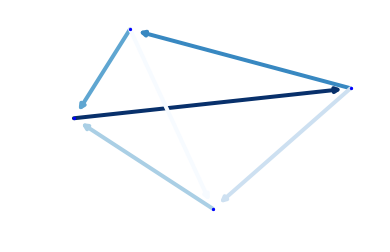

In [23]:
visualize_graph(process_graph_file('./graphs/small.csv'))

Czym ciemniejszy kolor, tym większy prąd płynie przez daną krawędź. Najciemniejsza krawędź jest krawędzią, na której znajduje się siła elektromotoryczna i wszystkie prądy sumują się do tej wartości. Widzimy, że na pozostałych krawędziach w zależności od oporu płynie prąd mniejszy lub większy zgodnie z oczekiwaniami.

W następnej części generujemy większe grafy do wizualizacji oraz sprawdzenia poprawności algorytmu. Używamy algorytmów z biblioteki networkx do gererowania i tworzenia layoutów dla grafów. W utworzonych grafach przypisujemy losowe wartości oporu i tworzymy krawędź zawierającą SEM.

In [24]:
def generate_graph(src, dest, gen, *arg):
    G = gen(*arg)
    nsrc = list(G.nodes)[src]
    ndest = list(G.nodes)[dest]
    G.add_edge(nsrc, ndest, R=0, sem=random.random()*100)
    for i,e in enumerate(G.edges.data()):
        edata = e[2]
        val = random.random()*10
        edata['sem'] = 0 if 'sem' not in edata else edata['sem']
        edata['R'] = random.random()*10 if edata['sem'] == 0 else 0 
        edata['no'] = i
    return G

In [25]:
def save_graph_as_file(G, file_name):
    with open('./graphs/' + file_name, 'w+') as file:
        writer = csv.writer(file)
        for e in G.edges.data():
            if 'sem' in e[2] and e[2]['sem'] != 0:
                writer.writerow(['s', e[0], e[1], e[2]['sem']])
            else:
                writer.writerow([e[0], e[1], e[2]['R']])
        file.close()

In [26]:
def get_edge_colors(G):
    return list(map(lambda x: x[2]['I'], G.edges.data()))

In [27]:
def prepare_and_show(file = None):
    ax = plt.gca()
    ax.set_axis_off()
    fig = plt.gcf()
    fig.set_size_inches(10, 10)
    if file:
        fig.savefig('./results_png/'+file+'.png', dpi=300)
    plt.show()

In [28]:
node_default = {
    'node_size': 5,
    'node_color': 'blue'
}
edge_default = {
    'width': 4, 
    'edge_cmap': plt.cm.Blues, 
    'with_labels': True
}

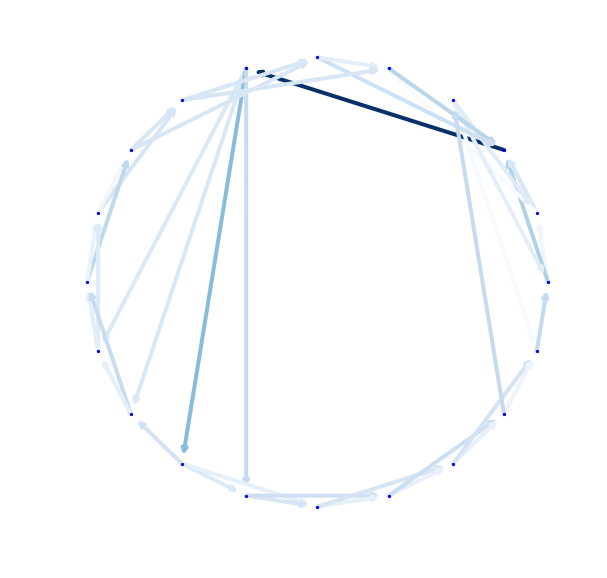

In [29]:
CG = generate_graph(1,10, nx.generators.classic.circulant_graph, 20, [1,2])
# save_graph_as_file(CG, 'circulant')
CG = process_graph(CG)
edge_prop = {**edge_default}
edge_prop['edge_color'] = get_edge_colors(CG)
pos = nx.circular_layout(CG)
nx.draw_networkx_nodes(CG, pos, **node_default)
nx.draw_networkx_edges(CG, pos, **edge_prop)
prepare_and_show()

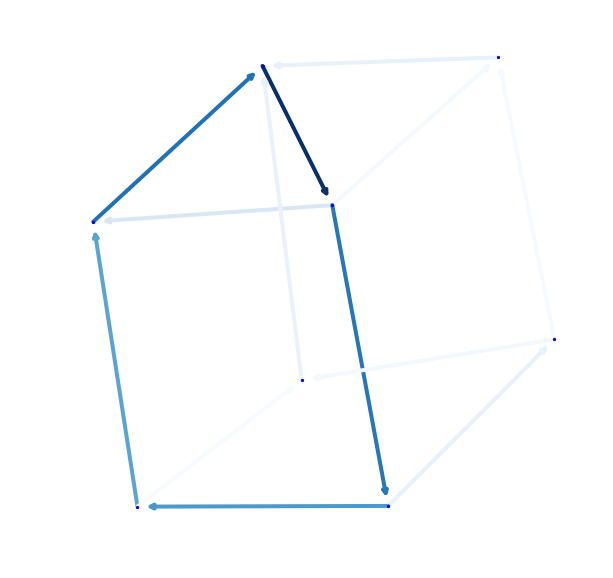

In [30]:
CbG = generate_graph(1,3, nx.generators.small.cubical_graph)
# save_graph_as_file(CbG, 'cubic')
CbG = process_graph(CbG)
edge_prop = {**edge_default}
edge_prop['edge_color'] = get_edge_colors(CbG)
pos = nx.layout.kamada_kawai_layout(CbG)
nx.draw_networkx_nodes(CbG, pos, **node_default)
nx.draw_networkx_edges(CbG, pos, **edge_prop)
prepare_and_show()

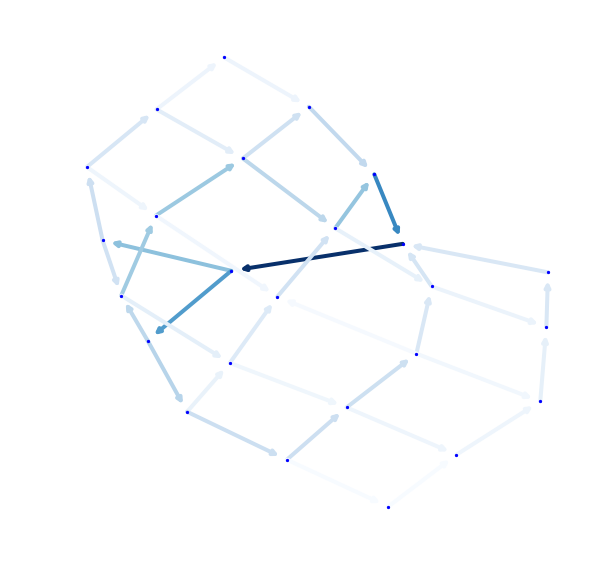

In [31]:
GG = generate_graph(1,-1, nx.generators.lattice.grid_2d_graph, 5, 5)
# save_graph_as_file(GG, 'grid.csv')
GG = process_graph(GG)
edge_prop = {**edge_default}
edge_prop['edge_color'] = get_edge_colors(GG)
init_pos = nx.layout.circular_layout(GG)
init_pos[list(GG.nodes)[0]]=[-1,-1]
pos = nx.layout.kamada_kawai_layout(GG, pos = init_pos)
nx.draw_networkx_nodes(GG, pos, **node_default)
nx.draw_networkx_edges(GG, pos, **edge_prop)
prepare_and_show()

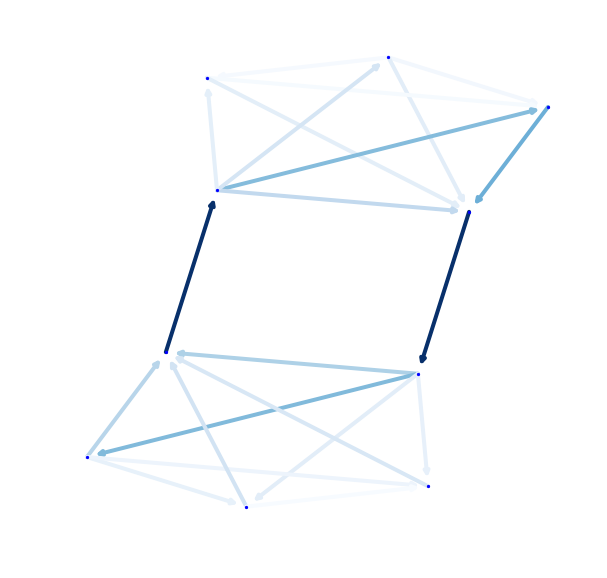

In [32]:
BG = generate_graph(1, 7, nx.generators.classic.barbell_graph, 5, 0)
# save_graph_as_file(BG, 'bridge.csv')
BG = process_graph(BG)
edge_prop = {**edge_default}
edge_prop['edge_color'] = get_edge_colors(BG)
pos = nx.layout.kamada_kawai_layout(BG)
nx.draw_networkx_nodes(BG, pos, **node_default)
nx.draw_networkx_edges(BG, pos, **edge_prop)
prepare_and_show()

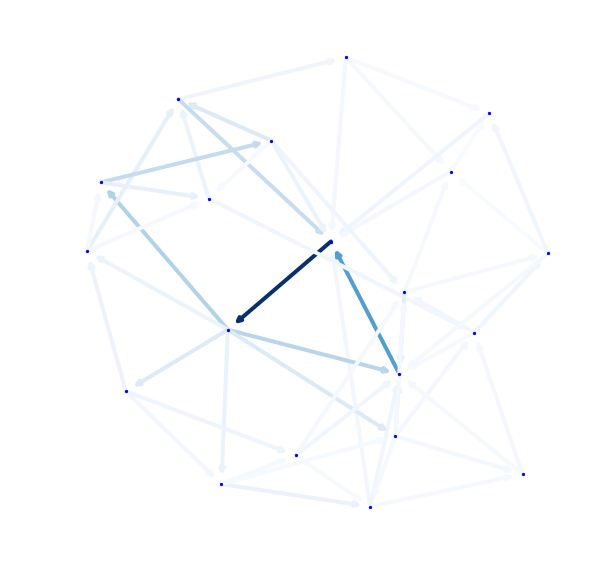

In [33]:
RG = generate_graph(1, 7, nx.generators.random_graphs.newman_watts_strogatz_graph, 20, 4, 0.3)
# save_graph_as_file(RG, 'random2.csv')
RG = process_graph(RG)
edge_prop = {**edge_default}
edge_prop['edge_color'] = get_edge_colors(RG)
pos = nx.layout.kamada_kawai_layout(RG)
nx.draw_networkx_nodes(RG, pos, **node_default)
nx.draw_networkx_edges(RG, pos, **edge_prop)
prepare_and_show()

Wygenerowane grafy są zapisane również w postaci plików csv w folderze graphs, natomiast ich wizualizację w folderze graphs_png. Na otrzymanych wizualizacjach dobrze widać płynące prądy mogące też oznaczać ważność danej krawędzi. Wyniki są zgodne z intuicją, np. dla dwóch grafów pełnych połączonych tylko dwoma krawędziami to właśnie one mają największą wartość (równą sobie).

Aby przetestować algorytm również dla większych grafów generujemy je losowy i uruchamiamy algorytm już bez wizualizacji.

In [34]:
def test_random(n):
    G = generate_graph(1, random.randint(2,n-1), 
                       nx.generators.random_graphs.newman_watts_strogatz_graph, n, random.randint(1,10), 0.3)
    process_graph(G)

In [35]:
test_random(500)
#for i in [50, 100,200,500,1000]:
#   test_random(i)

W czasie testów nie został rzucony wyjątek, więc za każdym razem algorytm zadziałał poprawnie.

Za pomocą prostych praw Kirchoffa oraz funkcji rozwiązujących układy równań liniowych możemy łatwo modelować nie tylko przepływ prądu w zadanych sieciach, ale również innych wartości. Algorytm nie jest bardzo skomplikowany i działa dla grafów wielkości rzędu $10^3$.